## Simple Linear Regression

#### Author : Amirhossein Khadivi

[linkedin]:https://linkedin.com/in/amirhossein-khadivi

##### [Linkedin][linkedin]

[github]:https://github.com/amirhossein-khadivi

##### [Github][github]

####  به آرایه تبدیل میکنیم Numpy  ابتدا داده ها را فراخوانی کرده و در یک متغیر ذخیره میکنیم و سپس داده ها با کمک کتابخانه

In [3]:
import numpy as np
data = np.loadtxt("C:\\Users\\Persian\\Desktop\\P031.txt" ,skiprows = 1)
data

array([[ 23.,   1.],
       [ 29.,   2.],
       [ 49.,   3.],
       [ 64.,   4.],
       [ 74.,   4.],
       [ 87.,   5.],
       [ 96.,   6.],
       [ 97.,   6.],
       [109.,   7.],
       [119.,   8.],
       [149.,   9.],
       [145.,   9.],
       [154.,  10.],
       [166.,  10.]])

### حال هر ستون داده را در یک متغیر با نام مربوط ذخیره میکنیم ، همچنین ابعاد داده ها را اصلاح میکنیم

In [4]:
Minutes = np.array(data[:,0]).reshape(14,1)
Units = np.array(data[:,1]).reshape(14,1)

### میخواهیم یک مدل خطی ساده بین متغیر طول مدت سرویس و تعداد قطعات تعویض یا تعمیرشده ارائه دهیم
### نمودار پراکنش مدت زمان سرویس را در مقابل تعداد قطعات تعمیر یا تعویض شده رسم میکنیم Matplotlib ابتدا با کمک کتابخانه

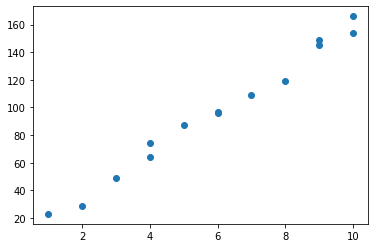

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x = data[:,1] , y = data[:,0])
plt.show()

### با توجه با نمودار یک رابطه خطی میان دو متغیر مشاهده میشود

### ضریب همبستگی پیرسون را محاسبه میکنیم scipy با کمک کتابخانه

In [6]:
import scipy.stats as ss
ss.pearsonr(x = data[:,1] , y = data[:,0]) 

(0.9936987461308754, 8.916254348358006e-13)

### با توجه به ضریب همبستگی دو متغیر نیز یک رابطه خطی مستقیم قوی بین متغیرها وجود دارد

### یک مدل خطی برای داده هایمان برازش میدهیم statmodels با کمک کتابخانه
### در این مدل متغیر پاسخ ، مدت زمان سرویس و متغیر توضیحی ، تعداد قطعات تعمیر یا تعویض شده میباشد
### عرض از مبدا را به مدل اضافه میکنیم add_constant به صورت پیشفرض مدل را بدون عرض از مبدا برازش میدهد ، بنابراین با تابع OLS تابع

In [7]:
import statsmodels.api as sm
Units1 = sm.add_constant(Units)
lm = sm.OLS(Minutes , Units1).fit()
lms = lm.summary()
lms

C:\Users\Persian\Anaconda3\envs\Rpy\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           8.92e-13
Time:                        00:16:49   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.239      -3.148      11.472
x1            15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### خروجی مدل را به جدول آنالیز واریانس ، ضرایب و آزمون فرض ها ، آماره های مهم تقسیم میکنیم
### در جدول اول ستون اول تعداد نمونه(14) ، درجه آزادی مانده ها(12) ، درجه آزادی مدل(1) و در ستون دوم ضریب تعیین(0.987)،ضریب تعیین
### تعدیل شده (0.986) ، آماره فیشر برای بررسی مناسبت مدل (943.2) و پی-مقدار آن تقریبا (0.000) محاسبه شده است
### تحلیل ضریب تعیین در اینجا یعنی 98.7 درصد تغییرات توسط مدل بیان میشود
### همچنین به دلیل کوچکتر بودن پی-مقدار آماره فیشر از سطح معناداری 0.05 ، فرض جانشین آزمون فرض مناسبت مدل یعنی مخالف صفر بودن ضریب  مدل
### تایید میشود

### در جدول دوم عرض از مبدا(4.1617) ، خطای استاندارد آن(3.355) و همچنین برای آزمون فرض آن آماره تی محاسبه شده 1.240 و پی-مقدار
### آن 0.239 محاسبه شده است که به دلیل بزرگتر بودن پی-مقدار از سطح معناداری 0.05 ، فرض صفر آزمون یعنی صفر بودن عرض از مبدا تایید میشود

### ضریب متغیر توضیحی نیز 15.5088 ، خطای استاندارد آن 0.505 و همچنین برای آزمون فرض آن آماره تی محاسبه شده 14.409 و پی-مقدار
### آن 0.000 محاسبه شده است که به دلیل کوچکتر بودن پی-مقدار از سطح معناداری 0.05 فرض صفر آزمون یعنی صفر بودن ضریب رد میشود

### همچنین برای عرض از مبدا و ضریب متغیر توضیحی فاصله اطمینان 95 درصدی محاسبه شده است
###  (-3.148 , 11.742) : عرض از مبدا
###  (14.409 , 16.609) : ضریب متغیر توضیحی
### در اینجا نیز با طویل بودن بازه اطمینان براورد عرض از مبدا به لازم نبودن از چارامتر در مدل پی میبریم.

### در جدول سوم نیز آماره دوربین واتسون و همچنین آماره جارکی برا به همرا پی-مقدارش ارئه شده که آماره دوربین واتسون به دلیل نزدیک بودن به 2
### نشان از ناهمبسته بودن باقیمانده ها و پی-مقدار آماره جارکی برا به دلیل بزرگرتر بودن از سطح معناداری 0.05 نشان از نرمال بودن توزیع مانده ها دارد

### تمام فاکتورهای این مدل مناسب بودند به جز اینکه مدل تاکید دارد که عرض از مبدا از مدل حذف شود که منطقی هم هست چون اگر قطعه ای نیاز به 
### تعمیر یا تعویض نداشته باشد، سرویسی نیز صورت نمیگیرد که بخواهیم مدت زمان آن را ثبت کنیم

### بنابراین مدل بدون عرض از مبدا را برازش میدهیم

### حال مدل خطی بدون عرض از مبدا را برازش میدهیم

In [8]:
lm1 = sm.OLS(Minutes , Units).fit()
lm1.summary()

C:\Users\Persian\Anaconda3\envs\Rpy\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5274.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    2.38e-18
Time:                        00:16:59   Log-Likelihood:                         -43.219
No. Observations:                  14   AIC:                                      88.44
Df Residuals:                      13   BIC:                                      89.08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            16.0744      0.221     72.625      0.000      15.596      16.553
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.341
Skew:                          -0.196   Prob(JB):                        0.843
Kurtosis:                       2.343   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### در جدول اول ، درستون اول تعداد نمونه(14) ، درجه آزادی مدل(1) ، درجه آزادی مانده ها(13) ارائه شده که توزیع آنها کی دو میباشد و در ستون 
### دوم ، ضریب تعیین(0.998)،ضریب تعیین تعدیل شده(0.997) ، آماره فیشر(5274) و پی-مقدار آن تقریبا(0.000) محاسبه شده است.
### تفسیر ضریب تعیین در اینجا یعنی 99.8 درصد تغییرات توسط مدل بیان میشود
### همچنین پی-مقدار آزمون فرض مناسبت مدل که آماره آن فیشر هست به دلیل کوچکتر بودن از سطح معناداری 0.05 ، فرض جانشین آزمون یعنی
### مخالف صفر بودن ضریب متغیر توضیحی را تایید میکند

### در جدول دوم ، ضریب متغیر توضیحی(16.0744) ، خطای استاندارد آن(0.221) براورد شده است و همچنین برای آزمون فرض ضریب
### آماره تی محاسبه شده(72.625) و پی-مقدار آن (0.000) محاسبه شده است که به دلیل کوچکتر بودن پی-مقدار از سطح آزمون 0.05 ،  
### فرض جانشین آزمون یعنی مخالف صفر بودن ضریب تایید میشود

### تفسیر شیب مدل برازش داده شده این است که میزان تغییرپذیری در میانگین متغیر پاسخ را وقتی که به متغیر توضیحی یک واحد اضافه 
### : میکنیم مشخص میکند ، برای مثال در این مدل
### y = 16.0744*(x+1) ----->>> y = 16.0744*x + 16.0744

### :همچنین برای ضریب متغیر توضیحی یک فاصله اطمینان به صورت زیر محاسبه شده است
### (15.596 , 16.553)

### در جدول سوم نیز آماره دوربین واتسون(1.870) ، آماره جارکی برا(0.341) و پی مقدار آن(0.843) محاسبه شده است
### .در ادامه به تفسیر آماره دوربین واتسون و پی-مقدار آماره جارکی برا میپردازیم که مربوط به تحلیل مانده ها میباشد

### با توجه به فاکتورها ی مدل ، مدلی مناسب ارائه داده ایم و فقط باید تایید نهایی یعنی تاییدیه تحلیل مانده ها بگیریم ***

### مقدار آماره دوربین واتسون هموار بین 0 تا 4 قرا میگیرد. اگر همبستگی بین داده ها وجود نداشته باشد باید آماره نزدیک به 2 باشد، اگر
### نزدیک به 0 باشد،یعنی همبستگی مثبت دارد و اگر نزدیک 4 باشد یعنی همبستگی منفی دارد.در مجموع اگر این آماره بین 1.5 تا 2.5 باشد
### .قابل قبول است
### .با توجه به مقدار آماره دوربین واتسون درمیابیم که مانده ها ناهمبسته هستند

### از پی-مقدار آماره جارکی برا برای آزمون فرض نرمال بودن داده ها استفاده میشود. بنابراین با توجه به مقدار پی-مقدار فرض صفر آزمون 
### . یعنی نرمال بودن مانده ها تایید میشود

### .حال به تحلیل مانده ها میپردازیم
### .ابتدا باقیمانده ها و مقادیر برازش شده ی مدل را جدا کرده و در یک دیتافریم ذخیره میکنیم

In [9]:
import pandas as pd
resi = lm1.resid
fit_value = lm1.predict(Units)
data1 = pd.DataFrame({'resi': resi , 'fit_value': fit_value})
data1

,resi,fit_value
0,6.925566,16.074434
1,-3.148867,32.148867
2,0.776699,48.223301
3,-0.297735,64.297735
4,9.702265,64.297735
5,6.627832,80.372168
6,-0.446602,96.446602
7,0.553398,96.446602
8,-3.521036,112.521036
9,-9.595469,128.595469


### نمودار چندک چندک که برای مطابقت داده ها(مانده ها) با توزیع نرمال است و بر اساس توزیع تجربی داده ها ترسیم میشود را رسم میکنیم، خط نمودار
### نیز بر اساس توزیع نرمال با میانگین صفر و واریانس یک رسم شده است و هرچه که نقاط نمودار به خط ترسیم شده نزدیک تر و بر آن منطبق تر باشند
### .نرمال بودن داده ها با قوت بیشتری تایید میشود

C:\Users\Persian\Anaconda3\envs\Rpy\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


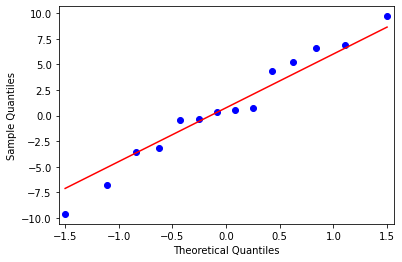

In [10]:
from statsmodels.graphics import gofplots as sgg
sgg.qqplot(data1['resi'] , line = 's')
plt.show()

### .با توجه به نمودار فرض نرمال بودن داده ها تایید میشود

### .برای اطمینان از این ادعا به استنباط آماری درباره توزیع مانده ها میپردازیم

In [11]:
a = ss.shapiro(data1['resi'])
b = ss.normaltest(data1['resi'])
c = ss.anderson(data1['resi'])

print(a) ; print(b)

print('Anderson.result','  statistic : ',c.statistic) ; cpp = c.statistic
for i in range(len(c.critical_values)):
    q = c.significance_level[i] ; w = c.critical_values[i]
    print(q,' : ',w)
    if q == 5 :
        cp = w

ShapiroResult(statistic=0.9721834659576416, pvalue=0.9044274091720581)
NormaltestResult(statistic=0.17646152113307798, pvalue=0.9155495796050577)
Anderson.result   statistic :  0.2245104816353507
15.0  :  0.497
10.0  :  0.566
5.0  :  0.68
2.5  :  0.793
1.0  :  0.943


C:\Users\Persian\Anaconda3\envs\Rpy\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### در خروجی مدل نیز با استفاده از آماره جارکی برا و پی-مقدار آن نرمال بودن ماند ها را تایید کردیم ، در اینجا نیز با کمک آزمون فرض شاپیرو ویلک 
### .اندرسون دارلینگ و نرمال تست و به دلیل بزرگتر بودن پی-مقدار آنها از 0.05 از نرمال بودن توزیع مانده ها مطمئن میشویم

### 0.9044274091720581 : پی-مقدار آزمون شاپیرو ویلک
### 0.9155495796050577 : پی-مقدار آزمون نرمال تست
### 0.68               : پی-مقدار آزمون اندرسون دارلینگ

### نمودار پراکنش مقادیر مانده ها در برابر مقادیر برازش شده را رسم میکنیم ، از این نمودار برای بررسی فرض خطی بودن مدل و همگنی واریانس خطاها استفاده میکنیم

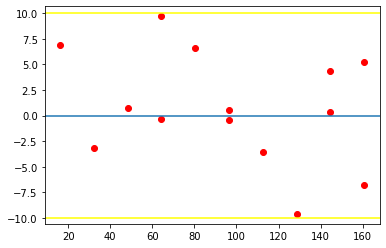

In [12]:
plt.scatter(x = data1['fit_value'] , y = data1['resi'] , color = 'red')
plt.axhline(0)
plt.axhline(10 , color = 'yellow')
plt.axhline(-10 , color = 'yellow')
plt.show()

### با توجه به اینکه نقاط نمودار در یک نوار افقی و حول محور صفر به صورت تصادفی و بدون داشتن الگوی خاصی توزیع شده اند ،بنابراین فرض خطی بودن مدل تایید میشود

### با توجه به اینکه پراکندگی نقاط نمودار در سرتاسر محور افقی یکسان است و الگوی خاصی ندارد ، بنابراین فرض همگنی واریانس خطاها نیز تایید میشود

### .حال فرض ناهمبسته بودن خطاها را بررسی میکنیم

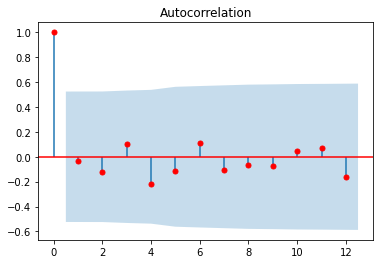

In [13]:
sm.graphics.tsa.plot_acf(data1['resi'] , color = 'red')
plt.show()

### با توجه به نمودار خودهمبستگی مانده ها ، چون تمام لگ ها به جز لگ صفر ، همه داخل بازه اطمینانشان هستند و کوچک هم هستند ، بنابراین
### .ناهمبسته بودن مانده ها تایید میشود

### .البته در خروجی مدل با استفاده از آماره دوربین واتسون نیز ناهمبسته بودن مانده ها تایید شده بود

##  : نتیجه گیری تحلیل مانده ها
### .هرچهار فرض بنیادی تایید شدند

#### فرض خطی بودن مدل رگرسیونی 
#### فرض همگن بودن واریانس خطاها
#### فرض ناهمبسته بودن خطاها
#### فرض نرمال بودن خطاها

# نتیجه گیری نهایی

## : مدل زیر مورد تایید میباشد

## y = 16.0744*x
## y : مدت زمان سرویس
## x : تعداد قطعات تعمیر یا تعویض شده